# Lab Book 3

In [225]:
# imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

## Question 1
Using `float_info` for the float data type (double precision), what is: (a) the largest
positive finite machine number; (b) the largest (in absolute value) negative finite machine number; (c) the
smallest positive machine number? You may need to read the documentation of `np.finfo`.

In [226]:
# Get floating-point information for default float data type
float_info = np.finfo(float)
# Machine epsilon
print(float_info.eps)

2.220446049250313e-16


In [227]:
# largest positive finite machine number
print(float_info.max)

1.7976931348623157e+308


In [228]:
# largest (in absolute value) negative machine number
print(float_info.min)

-1.7976931348623157e+308


In [229]:
# smallest positive machine number
print(float_info.eps)

2.220446049250313e-16


## Question 2
Find an example where `math.sin` or `math.cos` produces the wrong answer. How close is
Python’s calculation to the true value? Find an example where `math.sin` or `math.cos` produces exactly
the right answer.

We know that the roots of the $\sin$ function are multiplies of $\pi$. Here, the `math.sin` function produces a small positive number as the evaluation of $\sin(\pi)$. Since the true answer is 0, the error in the evaluation is the absolute value of the evaluation. Whilst wrong, `math` does have a very small error (very small absolute value). 

In [230]:
# example where trig function produces the wrong answer
math.sin(math.pi)

1.2246467991473532e-16

However, `math` returns the correct answer when passing in 0.

In [231]:
# example where trig function produces exactly the right answer
math.sin(0)

0.0

## Question 3
Evaluate $f(x)$ for $x = 10^{−2}, 10^{−3}, ...$ and compare your answer to the Taylor series. Comment on what you observe. Then find a better—but mathematically equivalent—way to evaluate $f(x)$. Check your new code is an improvement by comparing it to the Taylor series.

In [232]:
def f(x): return (np.cos(2*x)-1)/x**2
def taylor_f(x): return -2 + (2*(x**2))/3

In [233]:
# define our x to evaluate
t = np.array([10**(-i) for i in range(2, 15)])
# evaluate it using our function definition
f_t = f(t)
# evaluate using Taylor series approximation
taylor_t = taylor_f(t)
# determine if they are equivalent
f_t, taylor_t

(array([-1.99993333, -1.99999933, -1.99999999, -2.00000017, -1.99995576,
        -1.99840144, -2.22044605,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]),
 array([-1.99993333, -1.99999933, -1.99999999, -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        ]))

Here, as $x \rightarrow 0$, the $f(x)$ is initially close to ‑2 but then just breaks and returns 0. In contrast, the Taylor series approaches -2, which is the correct . The Taylor series approaches ‑2 (which is the correct limit $\lim_{x\rightarrow 0} f(x)$). The reason this occurs is catastrophic cancellation: since $\cos(2x) \to 1$, we subtract numbers whose relative difference is small compared to their magnitude. 

To avoid this, we express $f(x)$ differenly using double angle identities꞉ $$ \begin{aligned} f(x) &= \frac{\left(1‑\sin^2(x)\right)‑1}
{x^2}\\[2ex] &=\frac{‑\sin^2(x)}{x^2} \end{aligned} $$ 

We now define the revised function and evaluate on the same points꞉

In [234]:
def f_2(x):
    return (-2*(np.sin(x))**2)/(x**2)
f_2_t = f_2(t)
f_2_t

array([-1.99993333, -1.99999933, -1.99999999, -2.        , -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.        , -2.        , -2.        ])

These seem to better approach the true function value -2. We can confirm this using `np.allclose`:

In [235]:
np.allclose(f_2_t, taylor_t)

True

## Question 4
Look up the documentation of the function `math.expm1` and test it against the ‘obvious’ implementation using `math.exp` and a suitable Taylor series expansion. Comment on your results.

First, we define the Taylor series expansion of the function using $x^n/n!$ and instantiate the points to evaluate at:

In [236]:
def taylor(x):
    return x + (x**2)/2

def f(x): return math.exp(x) - 1

t = 10 ** (-np.linspace(2, 16, 15))

In [237]:
expm1_t = np.array(list(map(math.expm1, t)))
exp_t = np.array(list(map(f, t)))
taylor_t = np.array(taylor(t))

Looking at these arrays, we see that the Taylor series and `expm1` both approach the correct evaluation as the value passed in to the function decreases. However, due to catastrophic cancellation, the actual `exp` function that evaluates and then subtracts 1 fluctuates away from the true values:

In [238]:
taylor_t, exp_t, expm1_t

(array([1.00500000e-02, 1.00050000e-03, 1.00005000e-04, 1.00000500e-05,
        1.00000050e-06, 1.00000005e-07, 1.00000000e-08, 1.00000000e-09,
        1.00000000e-10, 1.00000000e-11, 1.00000000e-12, 1.00000000e-13,
        1.00000000e-14, 1.00000000e-15, 1.00000000e-16]),
 array([1.00501671e-02, 1.00050017e-03, 1.00005000e-04, 1.00000500e-05,
        1.00000050e-06, 1.00000005e-07, 9.99999994e-09, 1.00000008e-09,
        1.00000008e-10, 1.00000008e-11, 1.00008890e-12, 9.99200722e-14,
        9.99200722e-15, 1.11022302e-15, 0.00000000e+00]),
 array([1.00501671e-02, 1.00050017e-03, 1.00005000e-04, 1.00000500e-05,
        1.00000050e-06, 1.00000005e-07, 1.00000001e-08, 1.00000000e-09,
        1.00000000e-10, 1.00000000e-11, 1.00000000e-12, 1.00000000e-13,
        1.00000000e-14, 1.00000000e-15, 1.00000000e-16]))

## Question 5
By editing the code template below, use both approximations to estimate $f'(1)$ for the function $f(x) = e^x − \cos(x)$, for decreasing values of $h$. Estimate the order of convergence of both methods by plotting the approximation error (compared to the analytic derivative) against $h$. Comment on what you observe.

In [273]:
# begin by defining f(x)
def f(x):
    return np.exp(x) - np.cos(x)

# evaluate function and it's derivative
f_1 = f(1)
df_1 = np.exp(1) + np.sin(1)

Now we can find the approximation error for decreasing values of $h$. To find the each forward error and central error by subtracting the true value from the estimate꞉ 

$$ \begin{aligned} \text{Forward Error} &= \left\vert \frac{f(x+h)-f(x)}h - f'(x)\right\vert & 
\text{Central Error} &= \left\vert \frac{f(x+h)-f(x-h)}{2h} - f'(x)\right\vert \end{aligned}
$$

In [274]:
# shrink interval consecutively
hs = 2**(-np.linspace(0,30,128))
forward_error = np.zeros((len(hs),)) # error array for FD
central_error = np.zeros((len(hs),)) # error array for CD
for i in range(len(hs)):
    h = hs[i] # current interval width
    forward_error[i] = np.abs(((f(1+h) - f1)/h) - df1)
    central_error[i] = np.abs(((f(1+h) - f(1-h))/(2*h)) - df1)

We use a log-log plot to see how to error decreases:

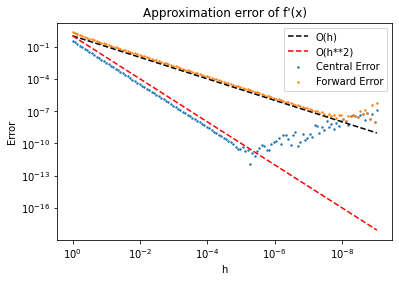

In [276]:
fo_r, so_r = hs, hs**2 # order rates
def plot_log_log_error(fo_r, so_r, second_div=False):
    plt.figure()
    plt.clf()
    plt.loglog(hs, fo_r, color = 'black', linestyle = '--', label = "O(h)")
    plt.plot(hs, so_r, color = 'red', linestyle = '--', label = "O(h**2)")
    if second_div:
        plt.scatter(hs ,second_derivative_errors, s = 2, label = 'Approximation error')
    else:
        plt.scatter(hs, central_error, s = 2, label = 'Central Error')
        plt.scatter(hs, forward_error, s = 2, label = 'Forward Error')
    plt.legend(loc = 'best')
    plt.gca().invert_xaxis()
    plt.title('Approximation error of f\'(x)')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.show()
    
plot_log_log_error(fo_r, so_r)

Obviously, central difference is the faster convering method. Forward and central difference methods have linear and quadratic convergence, respectively. Using the same number of evaluations, we achieve a much more accurate answer using central differencing. However, when the step size grows too small, we see that both methods lose accuracy due to floating point errors. Indeed, the central difference method begins to lose accuracy due to this much sooner (because of the further division of the interval $h$). Despite this, we see that we can still achieve higher accuracy with central differencing, despite it losing accuracy due to floating point error before forward differencing.

## Question 6
Implement the second derivative estimation method from lectures to estimate $f′′(1)$. Estimate the order of convergence by producing a plot similar to the above. 

Our approximation for the second derivative, for appropriately small $h$ is꞉ 
$$ f''(x) \approx \frac{f(x+h) - 2*f(x) + f(x-h)}{2h} $$
Let's use $h=-3$:

In [242]:
h = 10**(-3)
second_derivative_estimate = (f(1+h) - 2*f1 + f(1-h)) / (h**2)
second_derivative_estimate

3.258584315712909

Analytically deriving the second derivative gives $ f''(x) = e^1 + \cos(1) \approx 3.259 $, and so our estimate appears appropriate. We now use a for loop to progressively estimate values of the second derivative:

In [243]:
true_sd = np.exp(1) + np.cos(1)
sd_errors = np.zeros((len(hs),))

for i in range(len(hs)):
    h = hs[i] # current interval size
    estimate = (f(1+h) - 2*f1 + f(1-h)) / (h**2)
    sd_errors[i] = np.abs(true_sd - estimate)

We use our function defined above to plot the log-log error:

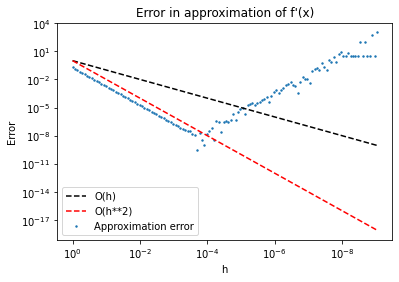

In [244]:
plot_log_log_error(fo_r, so_r, second_div=True)

Whilst the approximation error follows quadratic convergence (which matches the theoretical result shown in lectures) we see that it begins to lose accuracy due to floating point error when the step size $h$ is approximately $10^{-3}$. 

## Question 7
Rewrite `riemann_sum` using NumPy array operations, so that it does not have any loops, but still works for non-equally spaced nodes (you will need to use slicing from Lab 1). Use your new code to approximate $\int^1_{-1} e^{−x}dx$, and (with reference to theory from lectures) compare your approximation to the true value of the integral for increasing values of $n$ and comment on your results. 

In [245]:
def riemann_sum(xdata, ydata):
    """
    Approximate an integral using Riemann sums, based on evaluated
    function values (x0,y0), ..., (xn, yn).
    Inputs xdata and ydata are (xi,yi), both vectors of length n+1
    """
    n = len(xdata) - 1
    if len(ydata) != n+1:
        print("Lengths of xdata and ydata do not match")
        return np.nan
    # calculate Riemann sum
    approx_integral = np.sum((xdata[1:] - xdata[:-1]) * ydata[:-1])
    return approx_integral

Here, we deal with the lengths of `xdata` and `ydata` being different by returning `np.nan`. Whilst this prevents an error being returned, perhaps a more sensible choice would be throwing an exception, as Numpy can still perform some calculations with `nan` values, and this might leave the mismatched data unnoticed if no error or exception is thrown. 

We now define the function and evaluate its integral.

In [246]:
def f(x): return np.exp(-x)
xs = np.linspace(-1, 1, 1000)
ys = f(xs)
integral_estimate = riemann_sum(xs, ys)
integral_estimate

2.3527559274667316

Calculating the integral analytically, we get $\int_{‑1}^1 e^{‑x}xdx = e^1 ‑ e^{‑1} \approx 2.350 $, signifying that our Riemann sum is a good estimate. We now calculate the error for our approximation as the number of function evaluations $n$ increases: 

In [247]:
n_array = 2**(np.arange(2,20)) # increasing series of function evaluations
integral_errors = np.zeros(len(ns),) # error array
true_int = np.exp(1) - np.exp(-1) # analytic integral value
for i in range(len(n_array)):
    n = n_array[i] # number of func evals
    xs = np.linspace(-1, 1, n+1) 
    ys = f(xs) 
    estimate = riemann_sum(xs, ys) 
    integral_errors[i] = np.abs(estimate-true_int) # approximation error

We now plot the approximation error as our number of function evaluations $n$ increases. Since our interval width is $\frac2n$ (our whole interval has width 2), we can also plot the converging series $\mathcal O (h)$ and $\mathcal O\left(h^2\right)$.

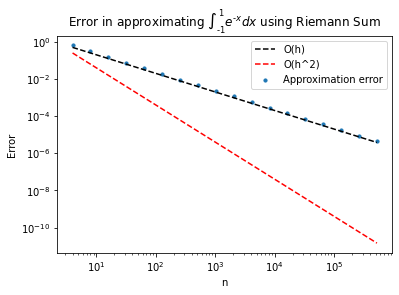

In [248]:
fo_rate, so_rate = 2/n_array, (2/n_array)**2
plt.figure()
plt.clf()
plt.loglog(n_array, fo_rate, color = 'black', linestyle = '--',
label = "O(h)")
plt.plot(n_array, so_rate, color = 'red', linestyle = '--',
label = "O(h^2)")
plt.scatter(n_array, integral_errors, s = 10, label = 'Approximation error')
plt.legend(loc = 'best')
plt.title('Error in approximating $\int_{‑1}^1e^{‑x}dx$ using Riemann Sum')
plt.xlabel('n')
plt.ylabel('Error')
plt.show()

We conclude from this plot that Riemann sums have linear convergence, as shown in lectures. The reason for the relatively poor convergence is the fact that Riemann sums approximate the function between interval points with a constant function. Using better function evaluations (such as polynomials or even just linear functions) will result in faster convergence. Thus, the composite trapezoidal rule below should have faster convergence. Despite this, the Riemann sums are guaranteed to converge to the correct integral as $h \to 0$, as our function $f$ is continuous (this is a key result in analysis).

## Question 8
Using `riemann_sum` as a starting point, write a function which implements the composite trapezoidal rule which works for non-equally spaced nodes (without using ‘for’ loops). Compare the accuracy of the trapezoidal rule to left Riemann sums and comment on what you observe. 

Using the function template from above, with exception handling for the case where the lengths of the evaluation points and evaluations don't match, we get the `composite_trapezoidal` function: 

In [249]:
def composite_trapezoidal(xdata, ydata):
    """
    Approximate an integral using the composite trapezoidal rule, based on
    evaluated function values (x0,y0), ..., (xn, yn).
    Inputs xdata and ydata are (xi,yi), both vectors of length n+1
    """
    n = len(xdata) - 1
    if len(ydata) != n+1:
        print("Lengths of xdata and ydata do not match")
        return np.nan
    # trap sum
    hlist = xdata[1:] - xdata[:-1]
    approx_integral = (np.sum((ydata[:-1] + ydata[1:]) * hlist))/2
    return approx_integral

In [250]:
xs = np.linspace(-1, 1, 1000)
ys = f(xs)
trap_integral_estimate = composite_trapezoidal(xs, ys)
trap_integral_estimate

2.3504031723243015

Comparing to our Riemann sum from above and the true theoretical value, we see that the composite trapezoidal rule also gives an answer that is approximately 2.350. We know calculate the error in our approximations as we use more and more evaluation points (the interval length shortens, or $n$ increases):

In [251]:
trap_errors = np.zeros((len(ns),))
for i in range(len(ns)):
    n = ns[i] # current number of evaluations
    xs = np.linspace(-1, 1, n+1) # equally spaced points
    ys = f(xs)
    estimate = composite_trapezoidal(xs, ys)
    trap_errors[i] = np.abs(estimate - true_int)

Plotting the results:

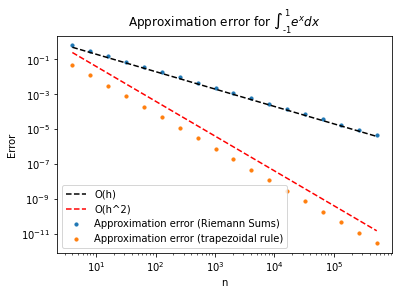

In [252]:
plt.figure()
plt.loglog(ns, fo_rate, color = 'black', linestyle = '--', label = "O(h)")
plt.loglog(ns, so_rate, color = 'red', linestyle = '--', label = "O(h^2)")
plt.scatter(ns, integral_errors, s = 10,
label = 'Approximation error (Riemann Sums)')
plt.scatter(ns, trap_integral_errors, s = 10,
label = 'Approximation error (trapezoidal rule)')
plt.legend(loc = 'best')
plt.title('Approximation error for $\int_{‑1}^1e^xdx$')
plt.xlabel('n')
plt.ylabel('Error')
plt.show()

So we see that using the composite trapezoidal rule has quadratic convergence to the true integral, whereas Riemann sums only has linear convergence. The composite trapezoidal rule will converge to the true function value much faster.

## Question 9
Use Simpson’s rule and Gaussian quadrature (both with 20 points) to calculate the integral
of Runge’s function,
$$
\int_{-1}^1 \frac{1}{1+25x^2}dx = \frac{\tan^{-1}(5) - \tan^{-1}(-5)}{5} \approx 0.549
$$
and compare the results.

Using the analytical solution of the integral, we see that the true integral is equal to $\approx 0.54936$. 

In [253]:
def runge(x): return 1/(1+25*(x**2))
true_runge = (np.arctan(5) - np.arctan(-5))/5
true_runge

0.5493603067780064

Using scipy's built-in integration methods, we get a value of $\approx 0.54938$ for Simpson's method, which is slightly different from the true integral but accurate to 4 decimal points.

In [254]:
import scipy.integrate as integrate

xs = np.linspace(-1, 1, 20)
eval_points = runge(xs)
runge_simpson = integrate.simpson(eval_points, xs)
runge_simpson

0.5493758748195977

Interestingly, integration with Gaussian quadrature yields a slightly less accurate answer. Whilst we cannot be sure what causes this, it may be due to the nature of the function at the endpoints, and the fact that we haven't got a typical polynomial defined in terms of positive integer coefficients.

In [255]:
runge_gaussian = integrate.fixed_quad(runge, -1, 1, n=20)[0]
runge_gaussian

0.548997098104952

## Question 10
Use `scipy.integrate.quad` to integrate Runge’s function as above for different absolute tolerance levels (set the relative tolerance to be very small). How good is the output error estimate to the true error?

First we loop over the different tolerances and calculate the integral estimates, and thus the error in the approximation using the analytic solution:

In [256]:
tolerances = 2**(-np.linspace(1, 50, 10))
runge_approxs = np.empty(shape = 0)
runge_errors = np.empty(shape = 0)
for i in range(len(tolerances)):
    approx, error = integrate.quad(runges, -1, 1, epsabs = tolerances[i], epsrel = np.finfo(float).eps)
    runge_approxs = np.append(runge_approxs, est)
    runge_errors = np.append(runge_errors, error)
    
runge_approxs, runge_errors, tolerances

/var/folders/k4/z1fdqs457dx3kgvlgz2mxrz80000gn/T/ipykernel_4124/2241214767.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  approx, error = integrate.quad(runges, -1, 1, epsabs = tolerances[i], epsrel = np.finfo(float).eps)


(array([0.54936031, 0.54936031, 0.54936031, 0.54936031, 0.54936031,
        0.54936031, 0.54936031, 0.54936031, 0.54936031, 0.54936031]),
 array([2.05599957e-06, 2.05599957e-06, 2.05599957e-06, 2.05599957e-06,
        2.86682794e-09, 2.86682794e-09, 6.07230914e-15, 6.07230914e-15,
        6.07230914e-15, 6.07230914e-15]),
 array([5.00000000e-01, 1.14823007e-02, 2.63686460e-04, 6.05545445e-06,
        1.39061098e-07, 3.19348269e-09, 7.33370573e-11, 1.68415629e-12,
        3.86759780e-14, 8.88178420e-16]))

We can now calculate the theoretical value of the integral, and compare the true errors in the approximation to the outtput errors from Scipy:

In [257]:
true_runge = (np.arctan(5) - np.arctan(-5))/5
true_errors = np.abs(runge_approxs - true_runge)
true_errors, runge_errors

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2.05599957e-06, 2.05599957e-06, 2.05599957e-06, 2.05599957e-06,
        2.86682794e-09, 2.86682794e-09, 6.07230914e-15, 6.07230914e-15,
        6.07230914e-15, 6.07230914e-15]))

We see that our true errors are so small that they're approximately 0 when represented on the computer. However, the error estimates of the Runge integral aren't zero - they're only accurate to about six decimal places. As the tolerance gets smaller, this accuracy improves, but still doesn't reach zero. This suggests that no matter how small we set the absolute tolerance, the `scipy.integrate.quad()` function is likely to miscalculate the error. However, as it seems to overestimate the error, it appears to provide a bound on the true error. Indeed, when the absolute tolerance gets incredibly small, Scipy provides a warning about overflow error.